# <span style="color:Maroon">Hurst Exponent Analysis

__Summary:__ <span style="color:Blue">Explore the hurst exponent for various window sizes on given data

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst as hs
import os
np.random.seed(0)

In [2]:
# User defined names
index = "Gold"
filename = index+".csv"
date_col = "Date"
hurst_windows = [100, 150, 200, 250, 300, 400]

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\sidhu\Downloads\Course 10 Capstone Project\Trading Strategy Development\Dev\Gold\Codes


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [5]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
df.index = pd.to_datetime(df.index)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,138.770004,137.720001,137.779999,138.720001,9219800,138.720001
2011-01-03,139.000000,137.880005,138.669998,138.000000,11510200,138.000000
2011-01-04,136.279999,134.160004,136.240005,134.750000,26154300,134.750000
2011-01-05,134.679993,133.100006,133.500000,134.369995,16700900,134.369995
2011-01-06,134.380005,133.139999,134.050003,133.830002,15965300,133.830002


## <span style="color:Maroon">Functions

In [6]:
def Calculate_Hurst(df, var, window_size, ser_type):
    """
    Calculates the hurst exponent for the var:variable in df:dataset for given rolling window size
    ser_type: gives the type of series. It can be of three types:
        'change':      a series is just random values (i.e. np.random.randn(...))
        'random_walk': a series is a cumulative sum of changes (i.e. np.cumsum(np.random.randn(...)))
        'price':       a series is a cumulative product of changes (i.e. np.cumprod(1+epsilon*np.random.randn(...))
    """
    hurst = [np.nan] * (window_size-1)
    var_values = list(df[var])
    for i in range(0, len(var_values)-(window_size-1)):
        H, c, data = hs.compute_Hc(var_values[i:i+window_size], kind=ser_type, simplified=True)
        hurst.append(H)
    df['hurst_'+str(window_size)] = hurst
    return df

## <span style="color:Maroon">Hurst Exponent time Plots

In [7]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

In [8]:
# Calculate hurst exponents for given window sizes
for i in range(0, len(hurst_windows)):
    df = Calculate_Hurst(df, 'Adj Close', hurst_windows[i], 'price')

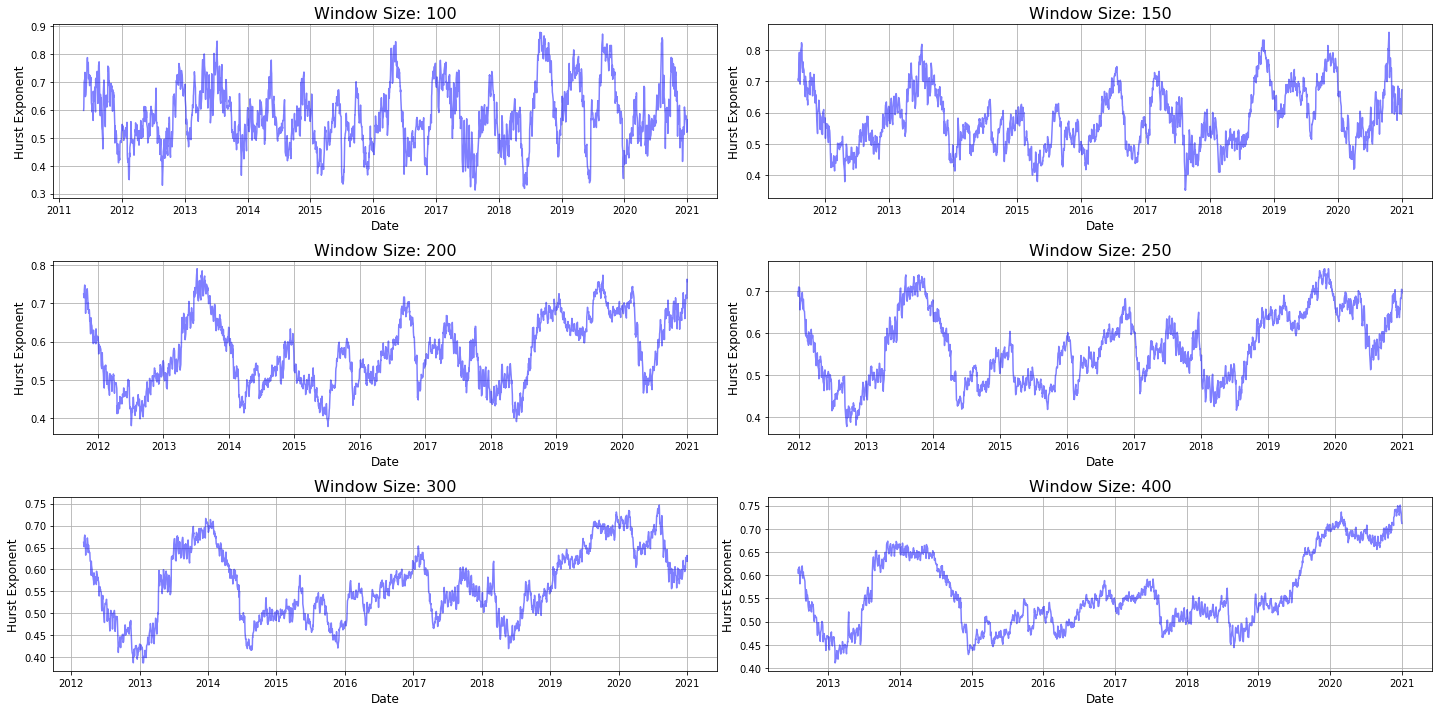

In [9]:
var_names = ['hurst_'+str(x) for x in hurst_windows]

# Plot hurst exponents
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.plot(df[var_names[0]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[0]), fontsize=16)
plt.grid()

plt.subplot(3,2,2)
plt.plot(df[var_names[1]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[1]), fontsize=16)
plt.grid()

plt.subplot(3,2,3)
plt.plot(df[var_names[2]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[2]), fontsize=16)
plt.grid()

plt.subplot(3,2,4)
plt.plot(df[var_names[3]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[3]), fontsize=16)
plt.grid()

plt.subplot(3,2,5)
plt.plot(df[var_names[4]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[4]), fontsize=16)
plt.grid()

plt.subplot(3,2,6)
plt.plot(df[var_names[5]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[5]), fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('Hurst Exponent for different window size for ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Window size 100 gives a volatile Hurst, but the plot for Hurst with window sizes 200, 300 and 400 is very similar. With higher window sizes the trend smoothens

## <span style="color:Maroon">Save the Data

In [10]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.to_csv(index +"_hurst"+".csv", index=True)